### Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

## 1. Inspecting the Data

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',150)

# Importing KMeans library
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Read the data
data = pd.read_csv(r"C:\Users\SHIPRA SHANDILYA\Downloads\Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Inspecting the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# Describing the data
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# Finding the shape of the dataset
data.shape

(167, 10)

In [6]:
# Finding the names of the columns
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
# Finding if any null values are present in the dataset
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

##### So, after inspecting the dataset we find that:
1. There are 10 columns in the dataset in which there are 9 continous variables and one of datatype object.
2. And also the shape of the dataset(167, 10), which concludes 167 rows.
3. There are no null values present in the dataset.

In [8]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


##### According to the data dictionary we find that the columns(exports, health, imports) are given as the %age od GDP per capita.So, we need to convert that in the actual numbers.

In [9]:
# Converting the percentage into numbers.
data['exports'] = (data['exports']*data['gdpp'])/100
data['health'] = (data['health']*data['gdpp'])/100
data['imports'] = (data['imports']*data['gdpp'])/100
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## 2. EDA

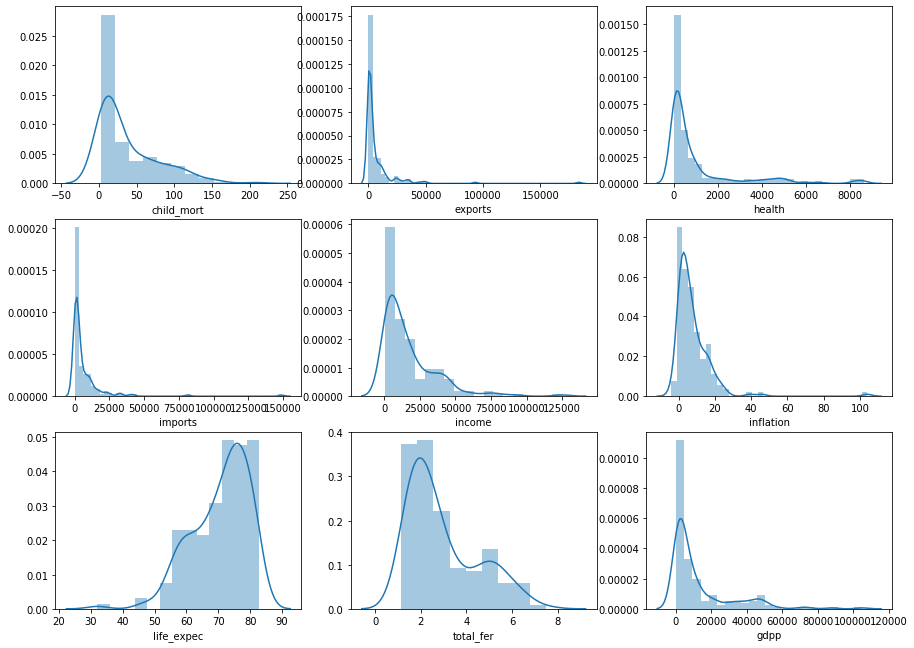

In [10]:
# Performing some univariate Analysis on continous variables
var = ['child_mort', 'exports', 'health', 'imports','income','inflation', 'life_expec','total_fer','gdpp']
plt.figure(figsize = (15,15))
for i in enumerate(var):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(data[i[1]])
plt.show()

--Need to add comment

In [11]:
# Analysis of the categorical variable
data.country.value_counts()

Sri Lanka       1
Seychelles      1
Albania         1
Norway          1
Comoros         1
               ..
Sierra Leone    1
Malta           1
Ecuador         1
Denmark         1
Australia       1
Name: country, Length: 167, dtype: int64

###  a.) Univariate Analysis

In [12]:
# Continuous Variables
var = ['child_mort', 'exports', 'health', 'imports','income','inflation','life_expec','total_fer','gdpp']
for i in var:
    print(i.upper(), "\n")
    print(data[i].describe())
    print("\n")

CHILD_MORT 

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: float64


EXPORTS 

count       167.000000
mean       7420.618847
std       17973.885795
min           1.076920
25%         447.140000
50%        1777.440000
75%        7278.000000
max      183750.000000
Name: exports, dtype: float64


HEALTH 

count     167.000000
mean     1056.733204
std      1801.408906
min        12.821200
25%        78.535500
50%       321.886000
75%       976.940000
max      8663.600000
Name: health, dtype: float64


IMPORTS 

count       167.000000
mean       6588.352108
std       14710.810418
min           0.651092
25%         640.215000
50%        2045.580000
75%        7719.600000
max      149100.000000
Name: imports, dtype: float64


INCOME 

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%     

### b.) Bivariate Analysis

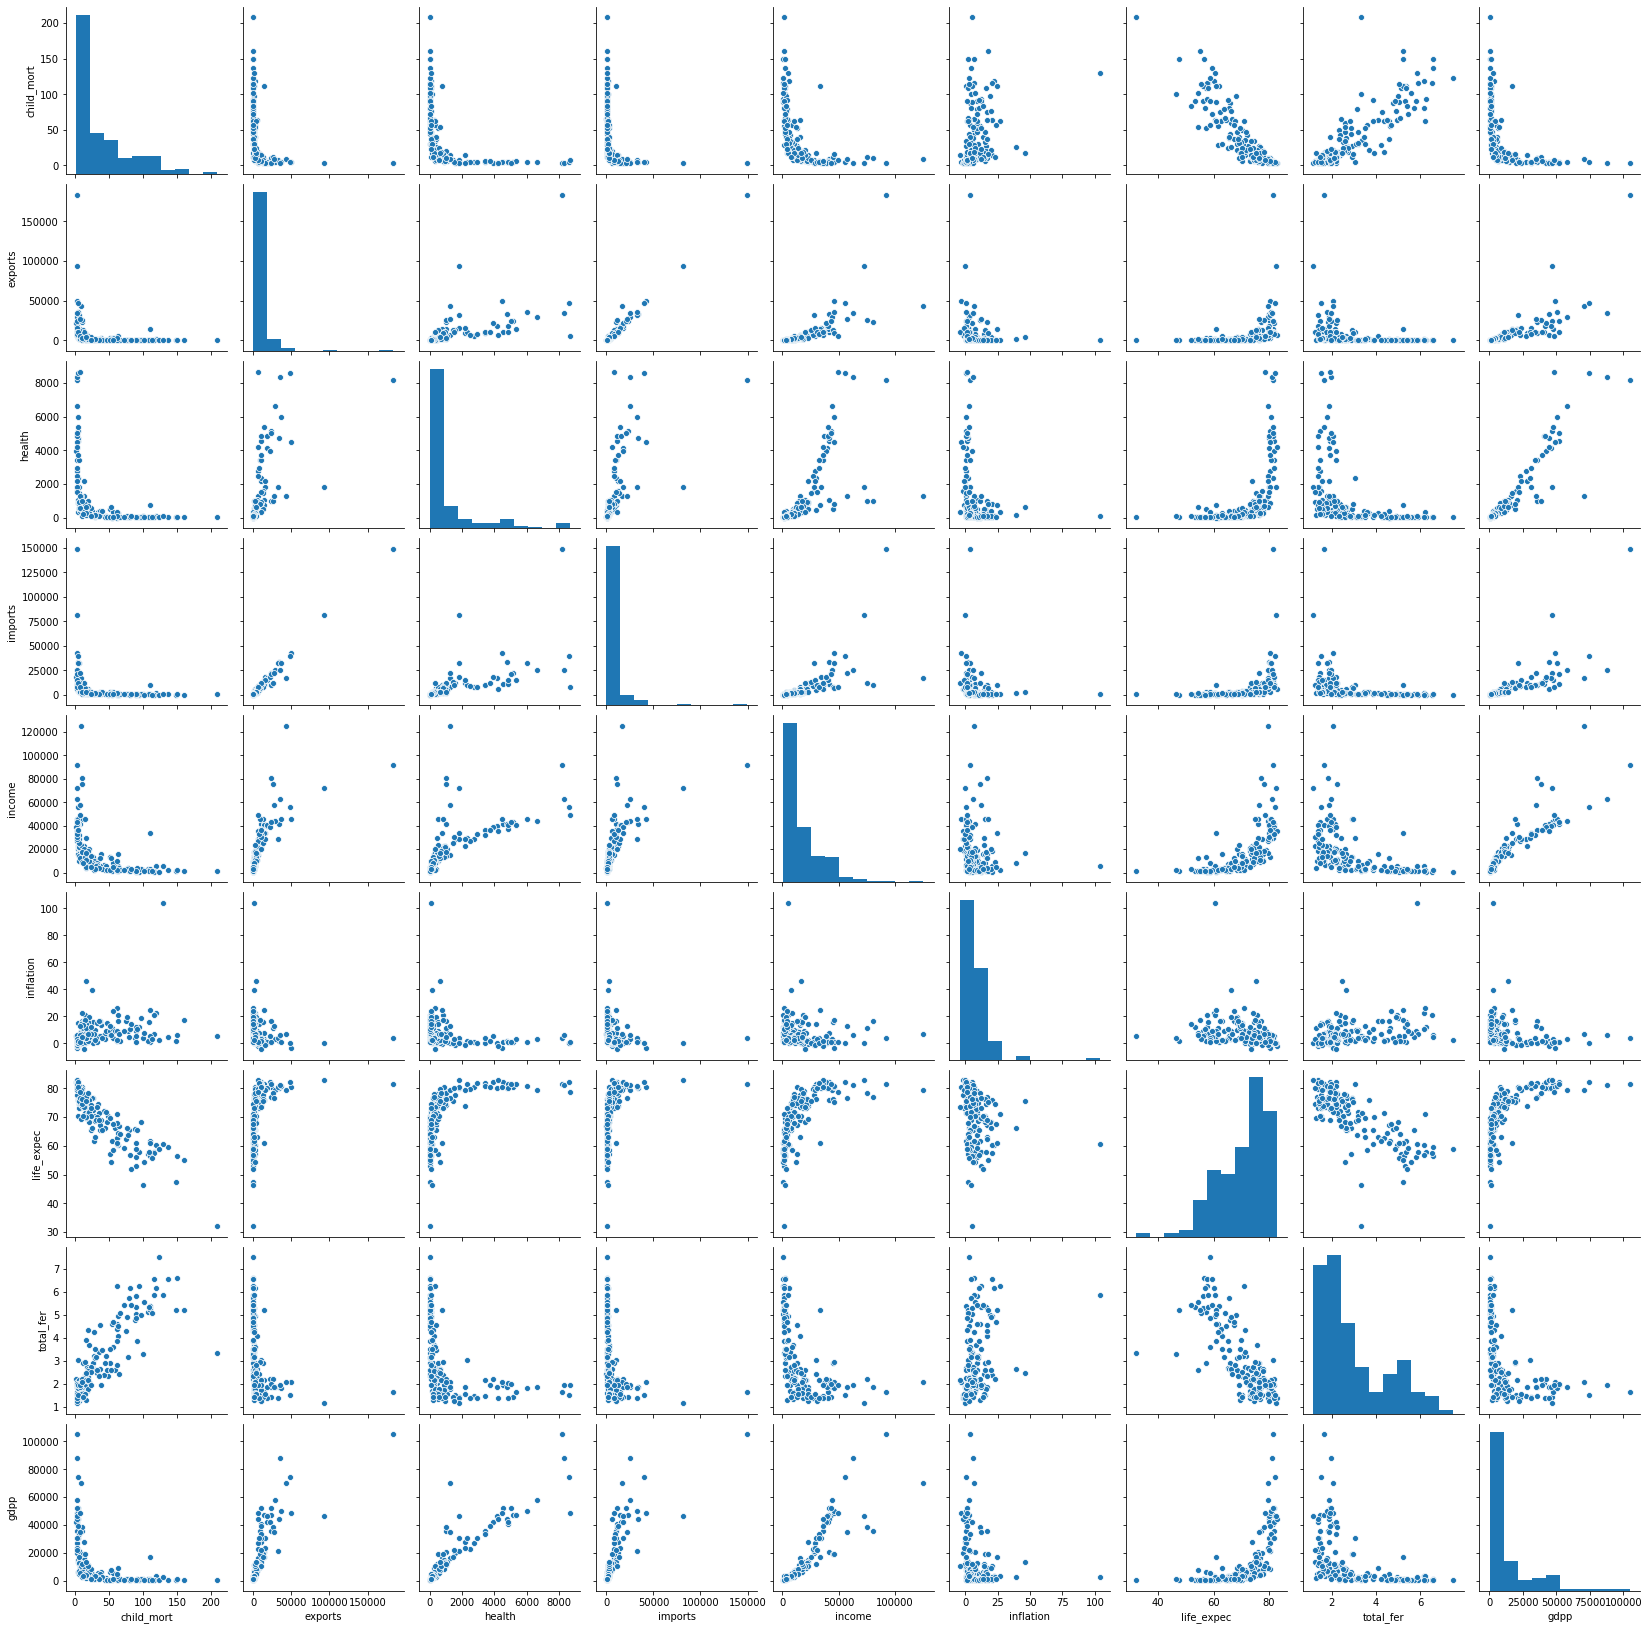

In [13]:
sns.pairplot(data)
plt.show()

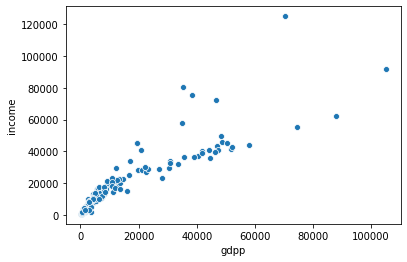

In [14]:
sns.scatterplot(x = 'gdpp', y = 'income',data = data)
plt.show()

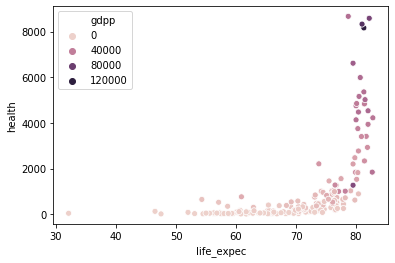

In [15]:
sns.scatterplot(x = 'life_expec', y = 'health',hue = 'gdpp', data = data)
plt.show()

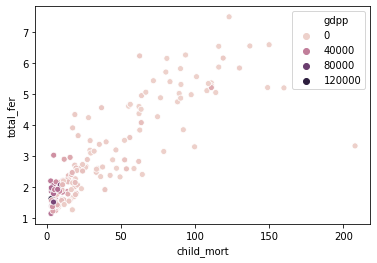

In [16]:
sns.scatterplot(x = 'child_mort', y = 'total_fer', hue = 'gdpp', data = data)
plt.show()

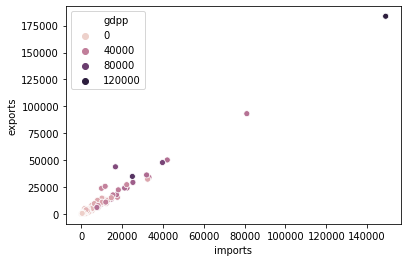

In [17]:
sns.scatterplot(x = 'imports', y = 'exports',hue= 'gdpp', data = data)
plt.show()

## 3. Outlier Treatment

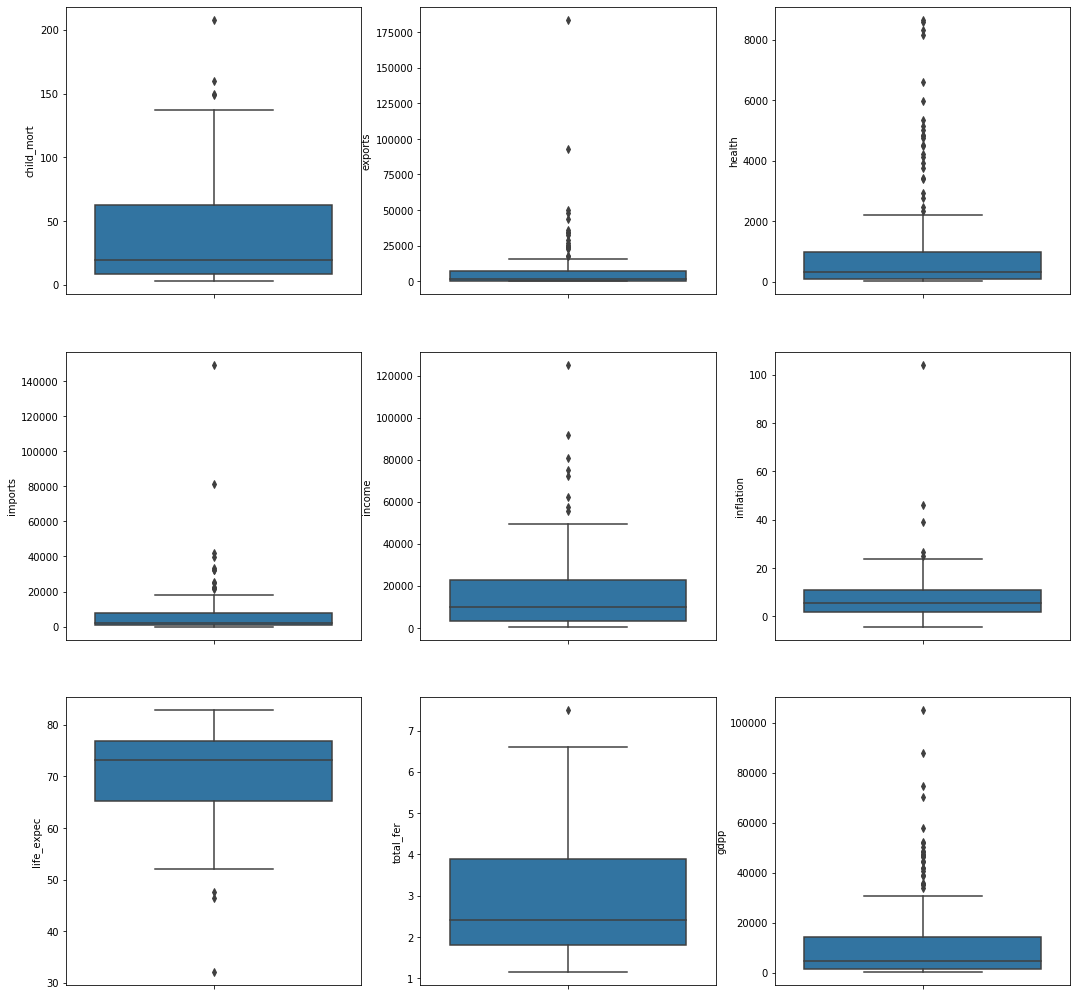

In [18]:
# Finding the outliers present if any by using boxplots:
plt.figure(figsize = (18,18))
for i in enumerate(var):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(y = i[1], data = data)  

#### Some observations which we can make from the above boxplots can be:
* We can see that outliers are present in almost every column of the dataset.
* Dropping the outliers in such case can be a bad idea as we have very less number of datapoints and also removing outliers can cause us loss of important information related to countries which may be in the direst need of AID.

In [19]:
# Examining  the major columns which will decide the countries in need of AID.
var = ['child_mort', 'exports', 'health', 'imports','income','inflation','life_expec','total_fer','gdpp']
for j in var:
    print(j.upper(),'\n')
    print(data[j].describe(percentiles=[0.75,0.95,0.97,0.99,1]))
    print('\n')

CHILD_MORT 

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
50%       19.300000
75%       62.100000
95%      116.000000
97%      130.140000
99%      153.400000
100%     208.000000
max      208.000000
Name: child_mort, dtype: float64


EXPORTS 

count       167.000000
mean       7420.618847
std       17973.885795
min           1.076920
50%        1777.440000
75%        7278.000000
95%       31385.100000
97%       36367.618000
99%       64794.260000
100%     183750.000000
max      183750.000000
Name: exports, dtype: float64


HEALTH 

count     167.000000
mean     1056.733204
std      1801.408906
min        12.821200
50%       321.886000
75%       976.940000
95%      4966.701000
97%      5998.226000
99%      8410.330400
100%     8663.600000
max      8663.600000
Name: health, dtype: float64


IMPORTS 

count       167.000000
mean       6588.352108
std       14710.810418
min           0.651092
50%        2045.580000
75%        7719.600000
95%       24241.56

#### From the columns description above we can see the difference between the 95th percentile, 99th percentile and the 100th percentile. Then we can deal with the outliers in such cases.
- We observe that for columns exports, imports there is a huge difference between the 99th percentile and the 100th percentile.
- And nearly for every column there is a huge difference between the 50th percentile and the 99th percentile.
- In order to deal with outliers we will be capping the outliers as there are very less number of data and dropping the outliers may hamper in finding the name of the country in need of AID.
- Capping the outliers for the upper and lower range by selecting the soft range i.e, (1st and the 99th percentile).

In [20]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [21]:
# Capping all the outliers
q1 = data['gdpp'].quantile(0.99)
q2 = data['child_mort'].quantile(0.01)
q3 = data['income'].quantile(0.99)
q4 = data['inflation'].quantile(0.01)
q5 = data['life_expec'].quantile(0.01)
q6 = data['exports'].quantile(0.99)
q7 = data['health'].quantile(0.99)
q8 = data['imports'].quantile(0.99)
q9 = data['total_fer'].quantile(0.99)

In [22]:
data['gdpp'][data['gdpp']>=q1]=q1
data['child_mort'][data['child_mort']<=q2]=q2
data['income'][data['income']>=q3]=q3
data['inflation'][data['inflation']<=q4]=q4
data['life_expec'][data['life_expec']<=q5]=q5
data['exports'][data['exports']>=q6]=q6
data['health'][data['health']>=q7]=q7
data['imports'][data['imports']>=q8]=q8
data['total_fer'][data['total_fer']>=q9]=q9

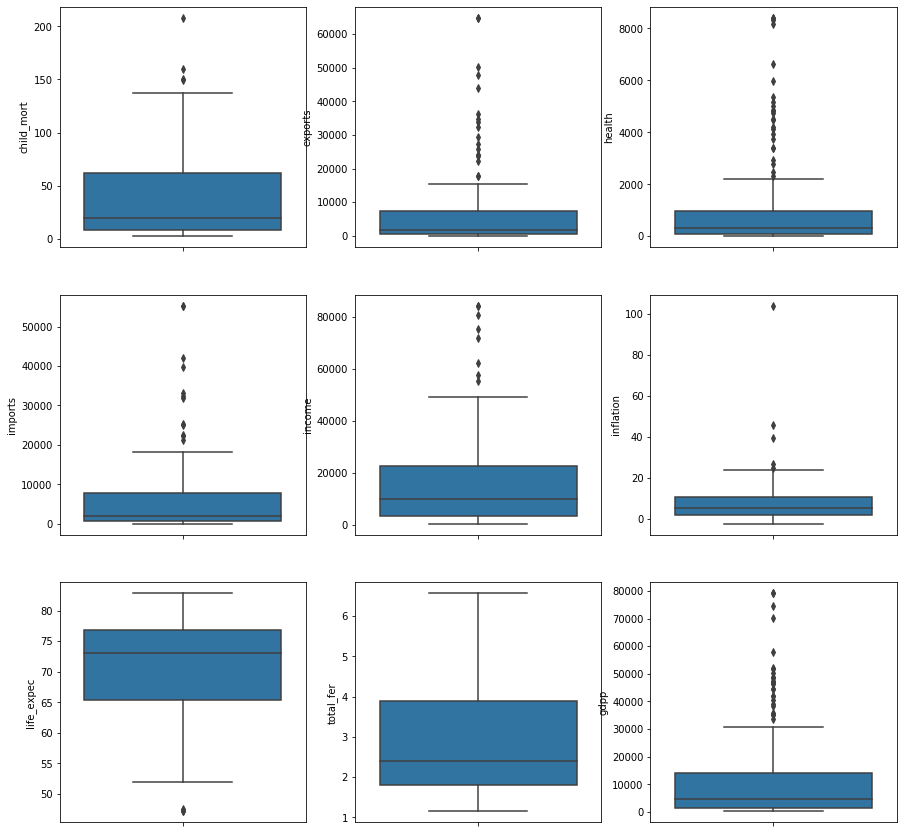

In [23]:
# Rechecking the outliers afterv capping
var1 = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize = (15,15))
for i in enumerate(var1):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(y = i[1], data = data) 

In [24]:
# Rechecking the percentiles
var = ['child_mort', 'exports', 'health', 'imports','income','inflation','life_expec','total_fer','gdpp']
for j in var:
    print(j.upper(),'\n')
    #print(data[j].describe(percentiles=[i for i in np.arange(0,1,0.1)]))
    print(data[j].describe(percentiles=[0.75,0.95,0.97,0.99,1]))
    print('\n')

CHILD_MORT 

count    167.000000
mean      38.271257
std       40.327869
min        2.800000
50%       19.300000
75%       62.100000
95%      116.000000
97%      130.140000
99%      153.400000
100%     208.000000
max      208.000000
Name: child_mort, dtype: float64


EXPORTS 

count      167.000000
mean      6538.214776
std      11415.308590
min          1.076920
50%       1777.440000
75%       7278.000000
95%      31385.100000
97%      36367.618000
99%      55136.308400
100%     64794.260000
max      64794.260000
Name: exports, dtype: float64


HEALTH 

count     167.000000
mean     1054.206622
std      1790.845342
min        12.821200
50%       321.886000
75%       976.940000
95%      4966.701000
97%      5998.226000
99%      8352.982736
100%     8410.330400
max      8410.330400
Name: health, dtype: float64


IMPORTS 

count      167.000000
mean      5873.135222
std       9422.700869
min          0.651092
50%       2045.580000
75%       7719.600000
95%      24241.560000
97%      3250

## 4. Hopkins Check

In [25]:
# Hopkins Check
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [26]:
hopkins(data.drop('country',axis = 1))

0.925703770007417

#### After running the hopkins score for multiple times we get an average of approx. 0.92, which is pretty good. It signifies that the data has good cluster tendency.

## 5. Scaling

In [27]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('country', axis = 1))
scaled_data

array([[ 1.29153663, -0.56962212, -0.56695778, ..., -1.69307077,
         1.92639646, -0.70225949],
       [-0.53899289, -0.47385792, -0.4403934 , ...,  0.66202581,
        -0.86505432, -0.49872564],
       [-0.27286971, -0.42399973, -0.48627082, ...,  0.6854596 ,
        -0.03498262, -0.47743428],
       ...,
       [-0.37235501, -0.49160668, -0.54024972, ...,  0.28708506,
        -0.66423052, -0.65869853],
       [ 0.44839871, -0.53995007, -0.55242911, ..., -0.36906125,
         1.15657191, -0.65869853],
       [ 1.11495022, -0.52701632, -0.54227159, ..., -2.1851805 ,
         1.64524315, -0.6500669 ]])

In [29]:
scaled_data = pd.DataFrame(scaled_data, columns = data.columns[1:])
scaled_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.156035,-1.693071,1.926396,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.314406,0.662026,-0.865054,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,0.788991,0.685460,-0.034983,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.387733,-1.236112,2.153997,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.604273,0.720610,-0.543736,-0.032042


## 6. K-Means Clustering

#### To find the value of 'k' we'll evaluate both:
- Silhouette Score
- Elbow Curve Method

    0         1
0   2  0.478612
1   3  0.424932
2   4  0.410759
3   5  0.417143
4   6  0.310667
5   7  0.296731
6   8  0.313199
7   9  0.294670
8  10  0.276956


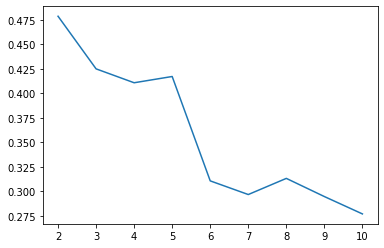

In [30]:
# Silhouette Score
ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(scaled_data)
    ss.append([k, silhouette_score(scaled_data, kmean.labels_)])
temp = pd.DataFrame(ss)
print(temp)
plt.plot(temp[0], temp[1])

- From the graph we can observe that the value of 'k' is maximum for k=2 (0.478612)
- The second highest silhouette score is for the value of k=3 (0.424932)

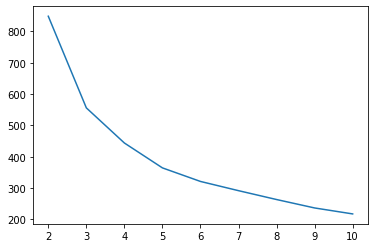

In [31]:
# Elbow Curve Method
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(scaled_data)
    ssd.append([k, kmean.inertia_])
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

- From the Elbow Curve we can see that the first breakpoint is at k=3.
    - We'll consider **k=3**

In [32]:
# Final K-Mean Clustering (k=3)
kmean = KMeans(n_clusters = 3, random_state = 101)
kmean.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [33]:
kmean.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [34]:
# Creating a copy of the original dataset
data_mean = data.copy()

In [35]:
# Converting the labels into the dataframe in order to concatenate it to the original dataframe
label = pd.DataFrame(kmean.labels_, columns = ['label'])

In [36]:
data_mean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [37]:
# Concatenating the label column to the  copy of the original datadset.
data_mean = pd.concat([data_mean, label], axis = 1)
data_mean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [38]:
# To find the number of datapoints which falls in each cluster
data_mean.label.value_counts()

1    92
0    48
2    27
Name: label, dtype: int64

In [39]:
# Filtering data
data_mean[data_mean['label'] ==2].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
7,Australia,4.8,10276.2,4530.87,10847.1,41400.0,1.160,82.0,1.93,51900.0,2
8,Austria,4.3,24059.7,5159.00,22418.2,43200.0,0.873,80.5,1.44,46900.0,2
15,Belgium,4.5,33921.6,4750.80,33166.8,41100.0,1.880,80.0,1.86,44400.0,2
23,Brunei,10.5,23792.2,1002.52,9884.0,80600.0,16.700,77.1,1.84,35300.0,2
29,Canada,5.6,13793.4,5356.20,14694.0,40700.0,2.870,81.3,1.63,47400.0,2


In [40]:
data_mean[data_mean['label'] ==1].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460.0,1
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200.0,1
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.90,75.8,2.37,10300.0,1
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220.0,1


In [41]:
data_mean[data_mean['label'] ==0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


## 7. Cluster Profiling

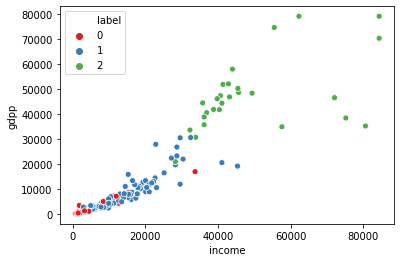

In [42]:
# Visualization of Clusters (income vs. gdpp)
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'label', data = data_mean, palette = 'Set1')

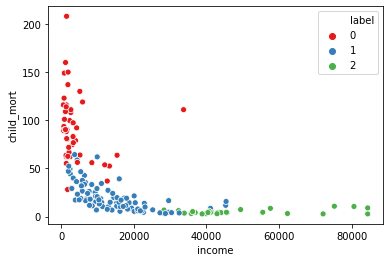

In [43]:
# Income vs. Child_mort
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'label', data = data_mean, palette = 'Set1')

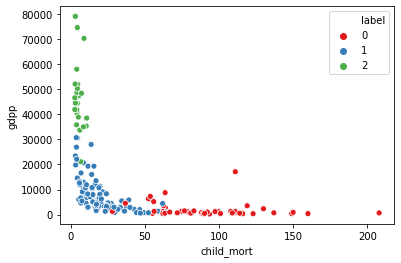

In [44]:
# Child_mort vs. gdpp
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'label', data = data_mean, palette = 'Set1')

In [45]:
data_mean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [46]:
# Grouping the data based on the labels
data_mean.drop('country', axis = 1).groupby('label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.567083,4.972233,1909.208333
1,20.177174,3650.066288,573.165330,3759.545881,14169.456522,7.015665,73.552174,2.225652,8226.869565
2,5.100000,26440.026667,4363.327807,22045.851111,49057.333333,3.152674,80.462963,1.775185,47476.888889


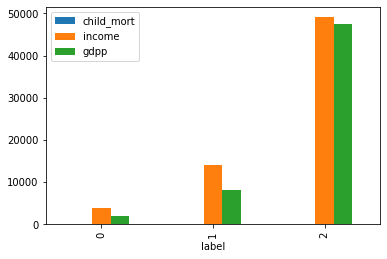

In [47]:
# Visualizing the grouping based on labels
data_mean.drop(['country','exports','health','imports','inflation','life_expec','total_fer'],
               axis = 1).groupby('label').mean().plot(kind = 'bar')

- From the above barplot we can conclude that cluster 2 forms countries having highest'gdpp' and highest 'income.
- Cluster 0 forms the countries having the lowest 'gdpp' and lowest 'income'

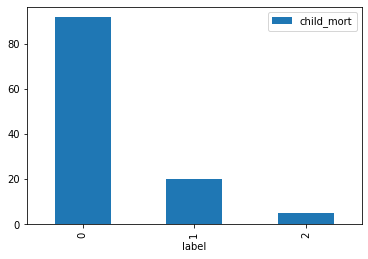

In [48]:
#Plotting just the 'child_mort' column because in the original dataset the values are not scaled and when we plot in the 
#previous graph that is the reason we cannot see the child_mort plot.
data_mean.drop(['country','exports','health','imports','inflation','life_expec',
                'total_fer','income','gdpp'], axis = 1).groupby('label').mean().plot(kind = 'bar')

- From the above barplot we can conclude that cluster 0 has the countries with highest 'child_mort' rate.
- Cluster 2 has the countries with lowest child_mort.

<Figure size 720x2160 with 0 Axes>

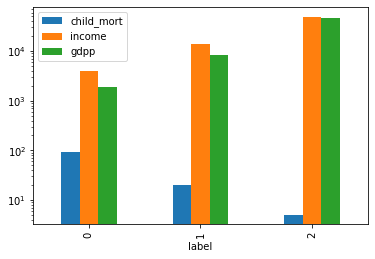

In [49]:
# Combining all three columns which needs to be examined in the same graph to conclude the results by using 'log scale'
plt.figure(figsize=(10,30))
data_mean.drop(['country','exports', 'health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.yscale('log')
plt.show()

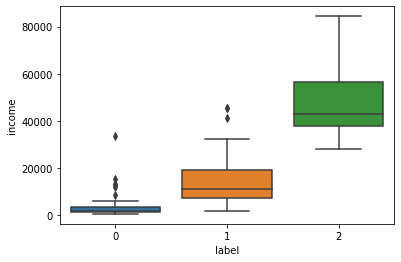

In [50]:
# Visualizing through boxplots:
sns.boxplot(x = 'label', y = 'income', data = data_mean)
plt.show()

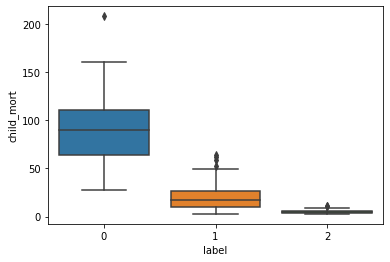

In [51]:
sns.boxplot(x = 'label', y = 'child_mort', data = data_mean)
plt.show()

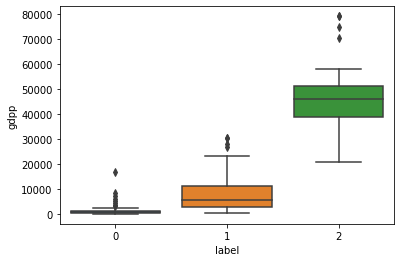

In [52]:
sns.boxplot(x = 'label', y = 'gdpp', data = data_mean)
plt.show()

#### Results of the clusters
- CLUSTER LABEL **0**
  - Cluster 0 has the highest child_mort, least income and least gdpp.
- CLUSTER LABEL **1**
  - Cluster 1 has the second highest child and the second least income and gdpp cluster.
- CLUSTER LABEL **2**
  - Cluster 2 has the highest income, highest gdpp and lowest child_mort.

### Conclusion
- Countries falling in **Cluster 0** are the ones with highest child_mort, least income and least gdpp.
- So, the countries which needs the AID will definitely fall under cluster 0.

### Finding the top 5 countries who are in dire need of AID

In [53]:
#Finding the top 5 countries who are in dire need of AID.
data_mean.sort_values(by = ['child_mort','income','gdpp'], ascending = [False,True,True]).head().country

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
Name: country, dtype: object

- All the 5 countries fall under Cluster 0

## 8. Hierarchical Clustering

In [54]:
data_mean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [55]:
scaled_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.156035,-1.693071,1.926396,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.314406,0.662026,-0.865054,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,0.788991,0.685460,-0.034983,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.387733,-1.236112,2.153997,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.604273,0.720610,-0.543736,-0.032042


### a.) Single Linkage

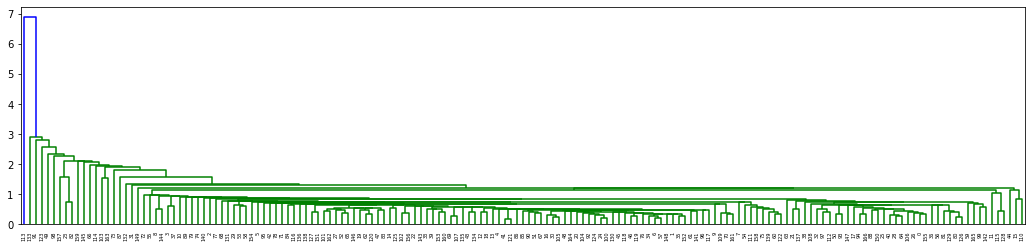

In [56]:
# Single linkage
plt.figure(figsize = (18,4))
mergings = linkage(scaled_data, method = 'single', metric = 'euclidean')
dendrogram(mergings)
plt.show()

### b.) Complete Linkage

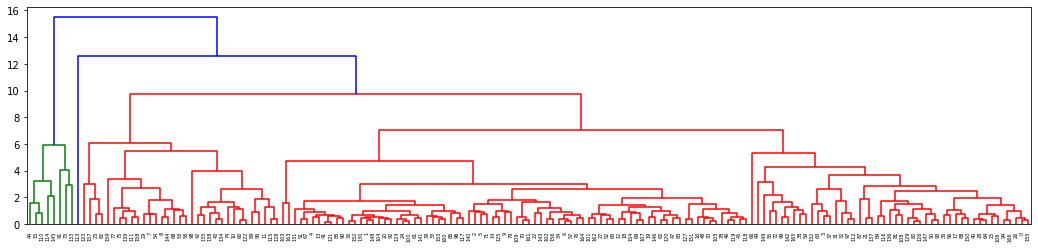

In [57]:
# Complete linkage
plt.figure(figsize = (18,4))
mergings = linkage(scaled_data, method = 'complete', metric = 'euclidean')
dendrogram(mergings)
plt.show()

Selecting ***k=3***

In [58]:
# Selecting the value of k as k=3
cluster_labels = cut_tree(mergings, n_clusters = 3).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
# Assigning cluster labels
data_mean['cluster_labels'] = cluster_labels
data_mean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0


In [60]:
data_mean.cluster_labels.value_counts()

0    158
1      8
2      1
Name: cluster_labels, dtype: int64

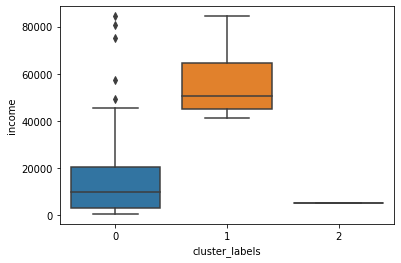

In [61]:
# Visualizing using boxplots
sns.boxplot(x = 'cluster_labels', y = 'income', data = data_mean)
plt.show()

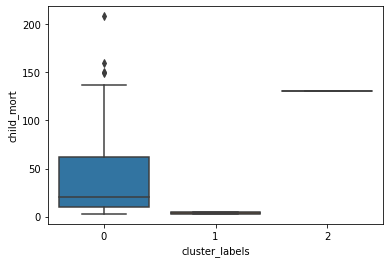

In [62]:
# Visualizing the child_mort
sns.boxplot(x = 'cluster_labels', y = 'child_mort', data = data_mean)
plt.show()

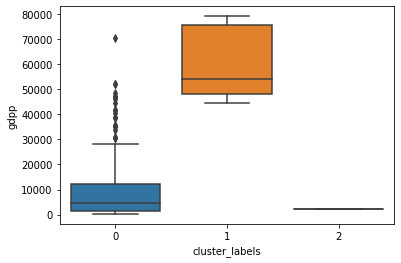

In [63]:
# GDPP
sns.boxplot(x = 'cluster_labels', y = 'gdpp', data = data_mean)
plt.show()

In [64]:
data_mean[data_mean['cluster_labels'] ==2].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
113,Nigeria,130.0,589.49,118.131,405.42,5150.0,104.0,60.5,5.84,2330.0,0,2


In [65]:
data_mean[data_mean['cluster_labels'] ==1].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
15,Belgium,4.5,33921.60,4750.80,33166.80,41100.0,1.8800,80.0,1.86,44400.0,2,1
44,Denmark,4.1,29290.00,6612.00,25288.00,44000.0,3.2200,79.5,1.87,58000.0,2,1
73,Ireland,4.2,50161.00,4475.53,42125.50,45700.0,-2.3488,80.4,2.05,48700.0,2,1
91,Luxembourg,2.8,64794.26,8158.50,55371.39,84374.0,3.6200,81.3,1.63,79088.0,2,1
110,Netherlands,4.5,36216.00,5985.70,31990.80,45500.0,0.8480,80.7,1.79,50300.0,2,1


In [66]:
data_mean[data_mean['cluster_labels'] ==0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0


In [67]:
data_mean[data_mean['cluster_labels'] ==0].sort_values(by = ['child_mort','income','gdpp'], 
                                                       ascending = [False,True,True]).head().country

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
Name: country, dtype: object

### The top 5 countries from both k-means and hierarchical clustering are:
- **Haiti**
- **Sierra Leone**
- **Chad**
- **Central African Republic**
- **Mali**